In [10]:
from matplotlib import pyplot as plt
import numpy as np

## Get points coordinates

In [5]:
def getPoints(name_tsp):
    with open(name_tsp) as f_o:
            data= f_o.read()
            lines = data.splitlines()
    # store metadata set information 
    name = lines[0].split(' ')[1]
        # here we expect the name of the problem

    nPoints =  np.int(lines[3].split(':')[1])
    print(nPoints)
        # here we expect the number of points in the considered instance
        
#     best_sol = np.float(lines[5].split(' ')[1])
        # here the lenght of the best solution
        
        
        # read all data points and store them 
    points = np.zeros((nPoints, 3)) # this is the structure where we will store the pts data 
    for i in range(nPoints):
        line_i = lines[7 + i].split(' ')
        points[i, 0] = int(line_i[0])
        points[i, 1] = float(line_i[1])
        points[i, 2] = float(line_i[2])
    return points

### Functions to see the points and see the path

In [6]:
def plotPoints(points, nPoints):
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 1], points[:, 2])
    for i, txt in enumerate(np.arange(nPoints)):  # tour_found[:-1]
        plt.annotate(txt, (points[i, 1], points[i, 2]))
    plt.show()

In [7]:
def plotSolution(ordered_points, points):
    plt.figure(figsize=(8, 8))
#     plt.scatter(points[:, 1], points[:, 2])
    for i, txt in enumerate(np.arange(len(points))):  # tour_found[:-1]
        plt.annotate(txt, (points[i, 1], points[i, 2]))
        
    ordX = []
    ordY = []
    
    for i in range(0, len(ordered_points)):
        ordX.append(points[ordered_points[i],1])
        ordY.append(points[ordered_points[i],2])
    plt.plot(ordX, ordY, marker='o', color='b')

    plt.show()

In [45]:
def compute_length(solution, dist_matrix):
    total_length = 0
    starting_node = solution[0]
    from_node = starting_node
    for node in solution[1:]:
        total_length += dist_matrix[from_node, node]
        from_node = node
    total_length += dist_matrix[starting_node, from_node]
    return total_length


def distance_euc(point_i, point_j):
    rounding = 0
    x_i, y_i = point_i[0], point_i[1]
    x_j, y_j = point_j[0], point_j[1]
    distance = np.sqrt((x_i - x_j) ** 2 + (y_i - y_j) ** 2)
    return round(distance, rounding)

In [156]:
class ProblemInstance:

    def __init__(self, name_tsp):
        self.exist_opt = False
        self.optimal_tour = None
        self.dist_matrix = None

        # read raw data
        self.file_name = name_tsp
        file_object = open(self.file_name)
        data = file_object.read()
        file_object.close()
        self.lines = data.splitlines()

        # store data set information
        self.name = self.lines[0].split(': ')[1]
        self.nPoints = np.int(self.lines[3].split(': ')[1])
        self.best_sol = np.float(self.lines[5].split(': ')[1])

        # read all data points and store them
        self.points = np.zeros((self.nPoints, 3))
        for i in range(self.nPoints):
            
            line_i = self.lines[7 + i].split(' ')
#             print(line_i)
            self.points[i, 0] = int(line_i[0])
            self.points[i, 1] = line_i[1]
            self.points[i, 2] = line_i[2]
        self.create_dist_matrix();
            
    def create_dist_matrix(self):
        self.dist_matrix = np.zeros((self.nPoints, self.nPoints))

        for i in range(self.nPoints):
            for j in range(i, self.nPoints):
                self.dist_matrix[i, j] = distance_euc(self.points[i][1:3], self.points[j][1:3])
        self.dist_matrix += self.dist_matrix.T

In [6]:
# example of random path
x = [98,72,48,57,105,77,12,95,66,9,13,32,20,107,7,43,46,39,50,59,123,90,91,122,110,55,56,8,109,18,17,49,45,79,121,54,41,16,87,82,38,70,104,61,108,75,44,40,25,96,69,106,6,67,47,24,88,14,23,115,99,78,111,114,42,103,128,0,127,116,22,21,36,119,52,53,117,34,129,5,101,98,73,74,4,10,60,68,63,97,86,11,28,30,33,126,62,31,35,83,112,118,51,93,71,102,37,64,2,120,58,29,15,80,94,3,92,19,113,125,84,89,124,27,1,26,76,81,100,85]

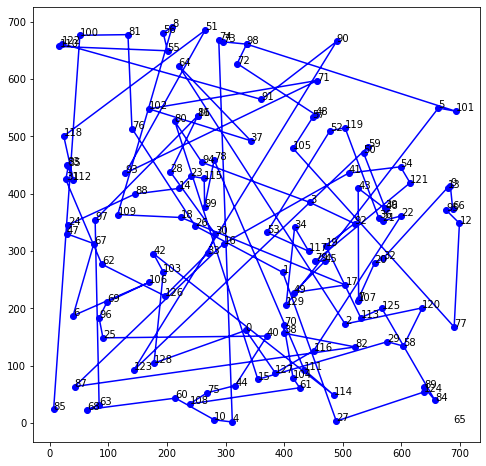

In [7]:
plotSolution(x, points)

### Example of a final solution for eil76 (not optimal)


76


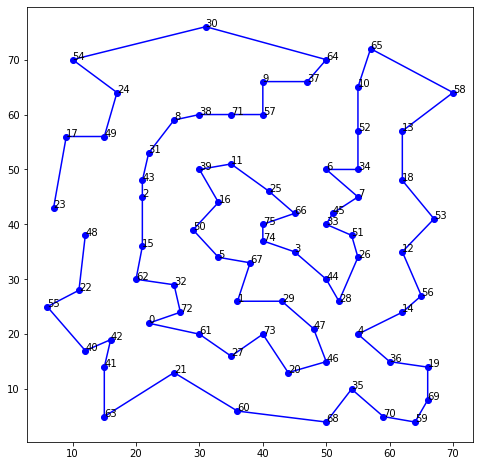

548.0


In [82]:
P = ProblemInstance('../AI_cup_2021_problems/eil76.tsp')
x = [48,22,55,40,42,41,63,21,60,68,35,70,59,69,19,36,4,14,56,12,53,18,13,58,65,10,52,34,6,7,45,33,51,26,28,44,3,74,75,66,25,11,39,16,50,5,67,1,29,47,46,20,73,27,61,0,72,32,62,15,2,43,31,8,38,71,57,9,37,64,30,54,24,49,17,23]
points = getPoints('../AI_cup_2021_problems/eil76.tsp')
plotSolution(x, points)
print(compute_length(x, P.dist_matrix))

### Example for ch130 (not optimal)

130


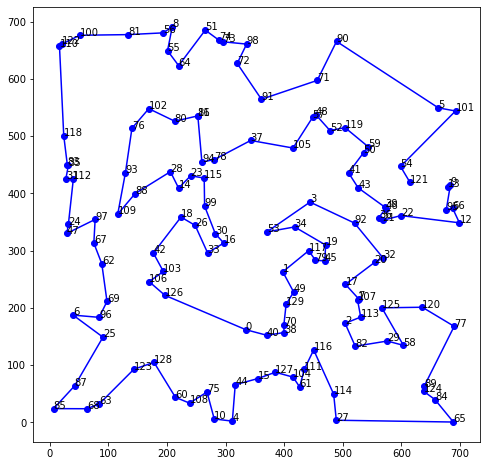

6281.0


In [84]:
P = ProblemInstance('../AI_cup_2021_problems/ch130.tsp')
x =[13,9,95,66,12,22,21,36,46,39,43,41,50,59,119,52,48,57,105,37,78,94,11,86,80,102,76,93,109,88,28,14,23,115,99,30,16,33,26,18,42,103,106,126,0,40,38,70,129,49,1,117,79,45,19,34,53,3,92,32,20,17,7,107,113,2,82,29,58,125,120,77,89,124,84,65,27,114,116,111,61,104,127,15,44,4,10,75,108,60,128,123,63,68,85,87,25,6,96,69,62,67,97,47,24,112,31,35,83,118,110,122,100,81,56,8,55,64,51,74,73,98,72,91,71,90,5,101,54,121]
points = getPoints('../AI_cup_2021_problems/ch130.tsp')
plotSolution(x, points)

print(compute_length(x, P.dist_matrix))

130


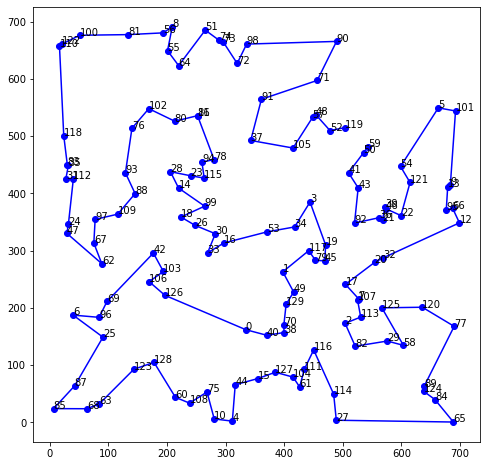

6211.0


In [113]:
P = ProblemInstance('../AI_cup_2021_problems/ch130.tsp')
x = [119,52,48,57,105,37,91,71,90,98,72,73,74,51,64,55,8,56,81,100,122,110,118,83,35,31,112,24,47,62,67,97,109,88,93,76,102,80,11,86,78,94,115,23,28,14,99,18,26,30,33,16,53,34,3,19,45,79,117,1,49,129,70,38,40,0,126,106,103,42,69,96,6,25,87,85,68,63,123,128,60,108,75,10,4,44,15,127,104,61,111,116,114,27,65,84,124,89,77,120,125,58,29,82,2,113,107,7,17,20,32,12,66,95,13,9,101,5,54,121,22,46,39,21,36,92,43,41,50,59]
points = getPoints('../AI_cup_2021_problems/ch130.tsp')
plotSolution(x, points)

print(compute_length(x, P.dist_matrix))

130


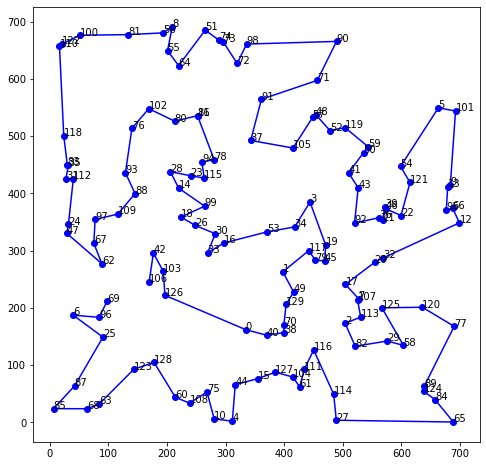

6202.0


In [114]:
P = ProblemInstance('../AI_cup_2021_problems/ch130.tsp')
x = [69,96,6,25,87,85,68,63,123,128,60,108,75,10,4,44,15,127,104,61,111,116,114,27,65,84,124,89,77,120,125,58,29,82,2,113,107,7,17,20,32,12,66,95,13,9,101,5,54,121,22,46,39,21,36,92,43,41,50,59,119,52,48,57,105,37,91,71,90,98,72,73,74,51,64,55,8,56,81,100,122,110,118,83,35,31,112,24,47,62,67,97,109,88,93,76,102,80,11,86,78,94,115,23,28,14,99,18,26,30,33,16,53,34,3,19,45,79,117,1,49,129,70,38,40,0,126,103,42,106]
points = getPoints('../AI_cup_2021_problems/ch130.tsp')
plotSolution(x, points)

print(compute_length(x, P.dist_matrix))

439


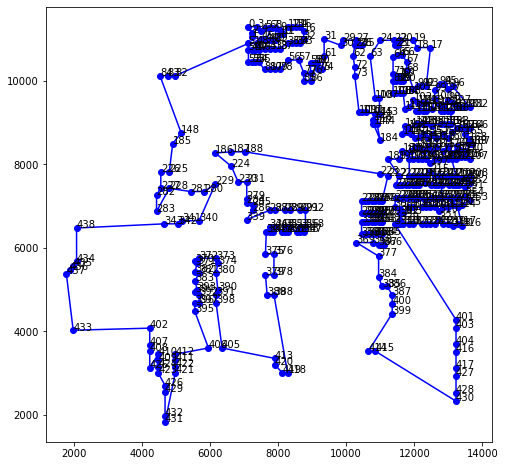

114784.0


In [86]:
x = [333,332,299,298,297,296,295,294,293,278,277,276,275,274,273,272,222,223,188,187,186,224,230,231,279,284,285,286,339,287,288,289,290,291,292,358,356,357,355,354,353,351,352,350,349,348,346,347,345,344,375,376,378,379,389,388,418,419,420,413,405,398,391,390,380,374,373,372,370,371,382,381,383,393,394,392,397,396,395,406,412,411,422,421,431,432,429,426,423,424,409,410,425,408,407,402,433,437,436,435,434,438,343,342,341,340,229,280,281,228,283,282,227,226,225,185,148,84,83,82,51,48,45,1,2,0,3,4,5,6,7,44,42,40,39,8,9,10,11,12,13,14,15,16,32,33,34,35,36,37,38,41,43,46,47,49,50,52,53,54,55,81,80,79,78,56,57,77,85,86,76,58,59,60,75,74,61,31,30,29,27,25,26,28,62,72,73,109,110,111,145,146,147,184,144,143,107,108,63,24,22,23,21,20,19,18,17,93,92,91,101,68,67,66,65,64,71,70,69,90,89,88,87,106,105,104,103,112,113,102,114,116,119,115,117,118,120,121,100,99,94,95,97,96,132,131,130,129,127,98,124,122,123,125,126,128,133,134,135,136,137,138,139,140,141,151,142,149,150,152,153,154,155,156,157,158,159,160,161,162,163,164,166,165,168,167,169,172,173,171,170,207,206,205,204,202,209,249,250,208,252,251,248,247,246,245,210,211,212,213,214,215,216,217,218,219,220,192,193,194,195,196,197,198,199,200,201,203,174,175,176,177,178,179,180,181,182,191,183,190,189,221,232,233,234,235,236,237,238,239,240,241,242,243,244,259,260,261,262,263,264,265,266,267,268,269,270,271,300,301,302,303,304,305,306,307,308,309,310,311,312,313,258,257,256,255,254,253,315,314,316,317,318,319,320,321,322,323,324,325,326,327,328,330,329,331,401,403,404,416,417,427,428,430,415,414,399,400,387,386,385,384,377,369,368,367,366,365,364,363,362,361,360,359,338,337,336,335,334]
P = ProblemInstance('../AI_cup_2021_problems/pr439.tsp')
points = getPoints('../AI_cup_2021_problems/pr439.tsp')
plotSolution(x, points)
print(compute_length(x, P.dist_matrix))

## An example of GAP=0.15

100


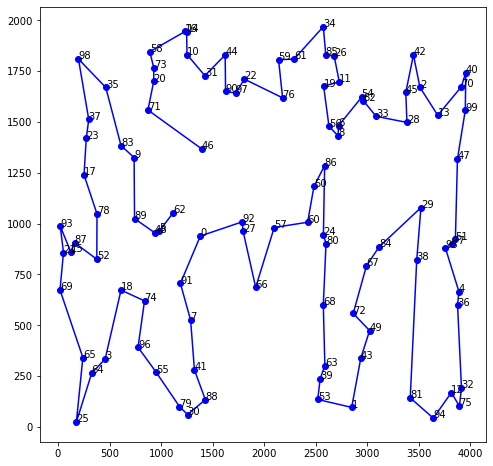

21315.0


In [125]:
x = [62,5,48,89,9,83,35,98,37,23,17,78,52,87,15,93,21,69,65,25,64,3,18,74,96,55,79,30,88,41,7,91,0,92,27,66,57,60,50,86,24,80,68,63,39,53,1,43,49,72,67,84,29,38,81,94,12,75,32,36,4,95,77,51,47,99,40,70,13,2,42,45,28,33,82,54,6,8,56,19,11,26,85,34,61,59,76,22,97,90,44,31,10,14,16,58,73,20,71,46]
P = ProblemInstance('./problems/kroA100.tsp')
points = getPoints('./problems/kroA100.tsp')
plotSolution(x, points)
print(compute_length(x, P.dist_matrix))

## Example with GAP = 0.04

100


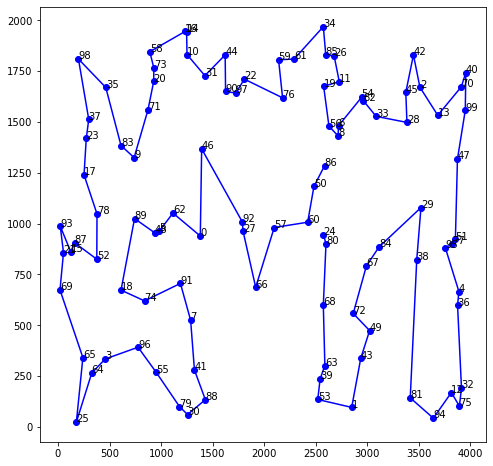

21292.0


In [139]:
x = [24,80,68,63,39,53,1,43,49,72,67,84,29,38,81,94,12,75,32,36,4,95,77,51,47,99,40,70,13,2,42,45,28,33,82,54,6,8,56,19,11,26,85,34,61,59,76,22,97,90,44,31,10,14,16,58,73,20,71,9,83,35,98,37,23,17,78,52,87,15,93,21,69,65,25,64,3,96,55,79,30,88,41,7,91,74,18,89,48,5,62,0,46,92,27,66,57,60,50,86]
P = ProblemInstance('./problems/kroA100.tsp')
points = getPoints('./problems/kroA100.tsp')
plotSolution(x, points)
print(compute_length(x, P.dist_matrix))

783


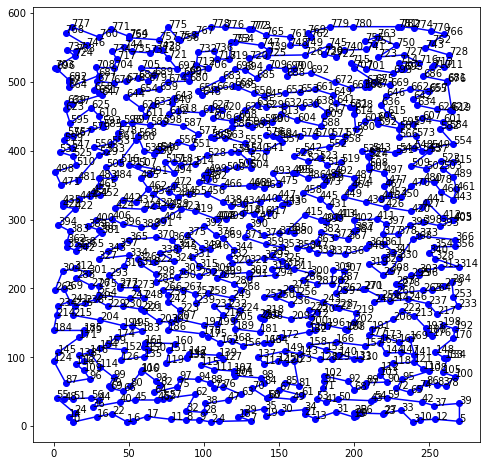

9378.0


In [157]:
x = [236,250,252,261,274,256,243,228,227,219,202,188,190,196,200,187,182,172,164,163,156,168,162,175,178,186,201,203,221,226,230,229,245,238,235,215,204,194,195,183,174,159,154,152,126,135,150,155,161,160,151,119,132,136,142,139,127,115,111,107,104,101,98,84,70,58,60,49,61,67,85,81,123,120,125,117,137,149,143,128,129,131,130,140,153,158,166,157,165,144,147,141,169,167,173,177,191,206,222,213,193,180,176,198,192,170,148,133,134,105,100,78,83,86,74,65,72,95,108,113,121,118,112,103,90,89,77,68,92,102,91,71,53,41,50,43,54,59,42,37,39,5,12,10,3,33,27,23,26,25,20,15,31,13,21,34,30,19,35,29,18,7,4,2,9,8,11,17,6,1,22,16,0,14,24,55,48,51,56,44,36,40,45,46,52,57,62,32,28,38,47,63,76,73,88,94,97,75,64,82,93,110,106,80,66,69,79,99,114,146,138,122,116,109,96,87,124,145,171,179,185,184,214,234,241,269,265,304,312,301,288,276,275,254,247,248,273,272,277,293,316,334,327,343,357,365,370,364,352,345,338,324,322,326,318,298,285,290,305,292,306,315,331,346,349,375,392,376,369,344,332,320,321,329,325,335,353,359,371,390,374,379,380,385,415,401,399,414,413,431,445,458,473,479,488,486,496,495,493,475,463,469,468,466,476,482,490,499,500,506,504,520,535,534,528,514,512,518,517,494,507,511,491,485,462,437,442,424,421,432,425,429,454,472,459,448,455,456,438,430,434,440,447,436,433,417,410,416,418,409,408,407,419,423,404,391,388,396,406,400,389,386,381,355,358,342,351,362,383,394,422,428,435,444,451,452,457,465,483,484,505,516,560,568,538,530,539,546,556,551,577,587,598,589,597,596,578,561,553,550,533,529,481,471,498,510,525,532,547,559,575,567,579,585,593,610,625,595,623,639,637,647,651,658,677,670,678,684,679,689,705,697,721,738,742,731,735,744,734,717,704,708,687,664,671,682,696,703,724,737,733,746,768,777,760,771,764,759,757,775,758,756,767,778,776,772,773,765,761,748,749,762,769,779,780,781,782,774,770,766,752,743,728,711,713,710,686,681,676,619,622,624,634,642,657,655,662,646,636,615,591,594,607,601,584,582,554,549,537,509,502,522,515,503,489,461,443,460,478,480,470,450,446,453,467,477,497,501,508,524,527,536,543,531,544,548,545,573,566,581,592,605,603,580,614,628,631,641,649,661,653,652,645,650,665,668,660,648,656,683,698,694,685,709,699,700,688,692,672,663,666,667,673,669,675,707,715,701,693,695,702,714,716,727,723,750,763,755,751,741,740,722,729,730,745,726,725,720,739,747,754,753,719,718,736,732,712,706,691,690,680,674,659,654,644,626,611,633,643,640,612,618,616,627,620,606,602,608,621,635,629,632,630,638,617,609,588,604,613,600,599,583,590,586,565,562,563,555,540,541,557,576,569,564,574,570,571,572,558,552,542,526,521,523,513,519,492,487,474,464,449,439,426,420,427,441,412,405,403,393,398,395,378,377,397,411,402,387,384,367,372,382,363,350,347,339,337,336,348,360,361,341,333,323,319,297,308,330,368,373,366,356,354,340,328,314,313,303,296,295,283,278,260,263,264,279,284,253,233,217,237,246,244,240,251,271,270,262,259,287,307,309,282,281,286,300,311,317,310,294,291,302,299,289,280,268,249,258,239,257,267,266,255,242,223,207,197,199,216,231,232,224,205,189,181,208,210,211,218,209,212,220,225]
P = ProblemInstance('./problems/rat783.tsp')
points = getPoints('./problems/rat783.tsp')
plotSolution(x, points)
print(compute_length(x, P.dist_matrix))

### 1577 Cities with 6% errors.
We can see the clusters only have one in-edge and one out-edge 

1577


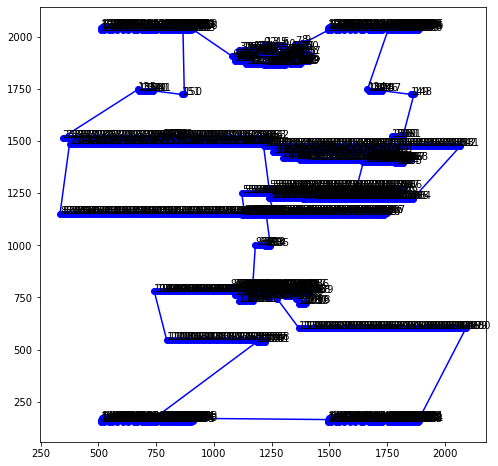

23754.0


In [188]:
x = [977,941,978,940,939,938,937,936,1059,1058,1057,1003,980,979,981,982,1002,1054,1005,1055,1004,1056,1098,1099,1097,1100,1101,1088,1089,1076,1053,1001,983,942,976,984,1000,999,943,944,945,975,946,974,947,973,948,972,987,971,988,970,949,950,993,994,1009,995,1008,1007,996,986,985,1006,1049,1050,997,998,1051,1052,1060,1077,1078,1079,1075,1074,1073,1072,1071,1061,1070,1062,1063,1082,1081,1069,1080,1086,1087,1090,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1391,1481,1523,1439,1392,1482,1524,1440,1393,1483,1525,1441,1394,1484,1526,1442,1395,1443,1396,1444,1485,1527,1486,1528,1487,1397,1445,1398,1488,1529,1530,1446,1399,1400,1448,1447,1489,1531,1490,1532,1491,1401,1449,1402,1450,1492,1533,1534,1576,1575,1438,1437,1522,1574,1521,1573,1480,1520,1479,1572,1571,1436,1519,1570,1569,1518,1435,1478,1434,1433,1477,1568,1567,1476,1432,1475,1566,1517,1431,1474,1516,1565,1564,1515,1430,1429,1428,1473,1563,1562,1514,1427,1472,1403,1451,1493,1535,1494,1404,1452,1405,1453,1495,1536,1537,1496,1406,1454,1538,1497,1407,1455,1408,1456,1498,1539,1540,1499,1409,1457,1410,1458,1500,1541,1542,1501,1411,1459,1412,1460,1502,1543,1544,1503,1413,1461,1414,1462,1504,1545,1546,1561,1560,1513,1559,1558,1557,1556,1510,1555,1509,1554,1553,1552,1551,1508,1507,1550,1506,1549,1548,1547,1505,1463,1415,1464,1416,1417,1418,1465,1419,1466,1420,1467,1421,1468,1422,1469,1423,1424,1470,1511,1471,1512,1425,1426,1204,1203,1202,1201,1138,1137,1136,1135,1134,1133,1132,1131,1130,1129,1128,1127,1126,1125,1124,1123,1122,1121,1120,1119,1118,1117,1116,1115,1114,1113,1112,1111,1110,1109,1108,1107,1106,1105,1104,1103,1102,1047,1046,1045,1044,1043,1042,1041,1040,1039,1038,1037,1036,1035,1034,1033,1032,1031,1030,1029,1028,1027,1026,1025,1024,1023,1022,1021,1020,1019,1064,1065,1066,1067,1096,1095,1094,1093,1092,1091,1085,1084,1083,1068,1012,1013,992,1014,1015,1016,1017,1018,959,958,960,957,961,956,962,955,963,954,964,991,965,990,966,989,1011,1048,1010,968,969,951,952,967,953,932,931,930,929,933,928,934,935,884,753,798,885,754,755,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,797,796,795,794,793,792,791,790,789,788,787,786,785,784,783,782,781,780,779,778,777,776,775,774,773,772,771,770,769,768,767,766,765,764,763,762,761,760,759,758,757,756,657,658,659,660,661,662,663,664,665,666,667,668,669,744,670,743,671,742,672,741,673,740,674,739,675,738,676,737,677,736,678,735,679,734,680,733,681,732,682,731,683,730,684,729,685,728,686,727,687,726,688,725,724,723,722,721,720,719,718,717,716,697,696,695,694,693,692,691,690,689,625,598,624,599,623,600,622,601,621,602,620,603,619,604,618,605,617,606,616,607,514,515,516,517,518,519,520,521,522,523,501,500,499,498,497,496,495,494,493,492,491,490,502,503,504,505,488,487,486,485,484,489,483,429,428,427,430,482,481,431,480,432,479,433,478,434,477,435,476,436,475,437,474,438,473,439,472,440,471,470,469,468,467,466,465,464,463,462,461,460,459,458,457,456,455,454,453,452,451,450,449,448,441,442,443,444,445,446,447,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,387,386,385,384,378,379,380,381,382,383,555,554,553,552,551,550,549,548,547,546,545,544,543,542,541,540,539,538,537,536,535,534,533,532,531,530,529,528,527,526,525,524,597,626,596,627,595,628,594,629,593,630,592,631,591,632,590,633,589,634,588,635,587,636,586,637,585,638,584,639,583,640,582,641,581,642,580,643,579,644,578,645,577,646,576,647,575,648,574,649,573,650,572,651,571,652,570,653,569,654,568,655,567,656,566,565,564,563,562,561,560,559,558,557,556,745,807,806,746,805,747,804,748,803,749,802,750,801,751,800,752,799,883,882,881,880,879,878,877,876,875,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,156,198,155,199,154,200,153,201,152,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,135,136,137,138,139,140,141,151,150,1360,1361,1362,1363,1317,1318,1319,1320,1359,1321,1358,1322,1357,1323,1356,1355,1325,1354,1326,1353,1352,1351,1350,1328,1349,1348,1347,1346,1331,1345,1332,1344,1343,1342,1341,1333,1334,1340,1335,1339,1338,1337,1336,1253,1252,1254,1251,1250,1249,1255,1248,1256,1247,1257,1246,1258,1245,1259,1244,1243,1260,1330,1261,1329,1242,1241,1262,1327,1240,1263,1239,1264,1238,1237,1265,1324,1266,1236,1267,1235,1268,1234,1269,1233,1270,1232,1271,1231,1272,1230,1229,1273,1316,62,63,90,104,103,102,101,124,123,122,121,85,68,67,86,87,88,89,64,65,66,30,29,28,31,27,32,26,33,11,12,13,34,49,35,48,47,50,61,60,51,59,120,119,118,125,117,126,116,127,115,128,129,130,131,132,133,98,92,93,80,79,74,75,76,77,78,94,114,105,113,106,112,107,111,108,110,109,97,96,95,57,56,55,20,19,18,17,41,40,42,39,43,38,44,37,45,54,53,73,72,71,81,91,99,100,82,52,70,69,83,84,58,46,23,22,21,24,25,14,0,1,2,3,4,5,6,10,36,15,16,7,8,9,1364,1315,1274,1228,1275,1365,1227,1226,1225,1314,1366,1367,1313,1276,1224,1312,1368,1277,1223,1278,1369,1370,1279,1222,1221,1280,1220,1311,1371,1372,1310,1219,1373,1374,1281,1309,1282,1308,1375,1376,1307,1218,1217,1377,1378,1283,1216,1284,1215,1285,1304,1214,1286,1213,1287,1212,1288,1211,1289,1210,1290,1209,1291,1208,1292,1207,1293,1206,1294,1205,1295,1390,1296,1389,1297,1388,1298,1387,1299,1386,1300,1385,1301,1384,1302,1383,1303,1382,1381,1305,1380,1306,1379,134,142,143,144,145,146,147,149,148,161,160,159,158,157,336,335,334,333,332,331,330,329,328,327,326,325,324,323,322,321,320,319,318,317,316,315,314,313,312,311,704,705,706,707,708,709,710,703,711,702,712,701,713,700,614,613,612,611,610,609,506,507,508,509,510,511,512,513,608,615,699,714,715,698]
P = ProblemInstance('./problems/fl1577.tsp')
points = getPoints('./problems/fl1577.tsp')
plotSolution(x, points)
print(compute_length(x, P.dist_matrix))

In [196]:
!ls ./

Plot solution.ipynb aco.cpp             problems
aco                 aco.dSYM
